In [301]:
import numpy as np
import random
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import StratifiedShuffleSplit
from mlxtend.frequent_patterns import apriori, association_rules
from collections import Counter
from multiprocessing import Pool
from collections import defaultdict


In [302]:
ratings = pd.read_csv('ml-latest-small\ml-latest-small\\ratings.csv')
movies = pd.read_csv('ml-latest-small\ml-latest-small\movies.csv')

<>:1: DeprecationWarning: invalid escape sequence '\m'
<>:2: DeprecationWarning: invalid escape sequence '\m'
<>:1: DeprecationWarning: invalid escape sequence '\m'
<>:2: DeprecationWarning: invalid escape sequence '\m'
C:\Users\Nothing\AppData\Local\Temp\ipykernel_18540\3141325891.py:1: DeprecationWarning: invalid escape sequence '\m'
  ratings = pd.read_csv('ml-latest-small\ml-latest-small\\ratings.csv')
C:\Users\Nothing\AppData\Local\Temp\ipykernel_18540\3141325891.py:2: DeprecationWarning: invalid escape sequence '\m'
  movies = pd.read_csv('ml-latest-small\ml-latest-small\movies.csv')


In [303]:
ratings = ratings[ratings['rating'] > 2]
ratings_count = ratings.groupby('userId').size().reset_index(name='ratings_count')
users = ratings_count[ratings_count['ratings_count'] > 10]['userId']
ratings = ratings[ratings['userId'].isin(users)]

split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)

for train_index, test_index in split.split(ratings, ratings['userId']):
    train_set = ratings.iloc[train_index]
    test_set = ratings.iloc[test_index]


In [304]:
user_movie_list = train_set.groupby('userId')['movieId'].apply(list).reset_index(name='movies_watched')
# all_user_ids = pd.DataFrame({'userId': range(1, 611)})
# user_movie_list = pd.merge(all_user_ids, user_movie_list, on='userId', how='left')


In [305]:
temp = user_movie_list['movies_watched'].tolist()
unique_items = set(item for sublist in temp for item in sublist)
candidate = [[item] for item in sorted(unique_items)]
candidate_1 = candidate.copy()
print(candidate)
print(len(candidate))

[[1], [2], [3], [4], [5], [6], [7], [8], [9], [10], [11], [12], [13], [14], [15], [16], [17], [18], [19], [20], [21], [22], [23], [24], [25], [26], [27], [28], [29], [30], [31], [32], [34], [36], [38], [39], [40], [41], [42], [43], [44], [45], [46], [47], [48], [49], [50], [52], [53], [54], [55], [57], [58], [60], [61], [62], [63], [64], [65], [66], [68], [69], [70], [72], [73], [74], [75], [76], [77], [78], [79], [80], [81], [82], [83], [85], [86], [87], [88], [89], [92], [93], [94], [95], [96], [97], [99], [100], [101], [102], [103], [104], [105], [106], [107], [108], [110], [111], [112], [113], [116], [118], [119], [121], [122], [123], [125], [126], [132], [135], [137], [140], [141], [144], [145], [146], [147], [148], [150], [151], [153], [154], [155], [156], [157], [158], [159], [160], [161], [162], [163], [164], [165], [166], [168], [169], [170], [171], [172], [173], [174], [175], [176], [177], [180], [181], [183], [185], [186], [187], [188], [189], [190], [191], [193], [194], [19

In [306]:
def getCandidate(frequent):
    candidate = []
    size= len(frequent[0])

    frequent_set = set(tuple(item) for item in frequent)

    for i in range(len(frequent)):
        for j in range(i+1, len(frequent)):
            if frequent[i][:size-1] == frequent[j][:size-1]:
                temp = frequent[i] + [frequent[j][size-1]]

                if all(tuple(sorted(temp[:k] + temp[k+1:])) in frequent_set for k in range(size)):
                    candidate.append(temp)

    return candidate

In [307]:
def getFrequent(candidate, user_movie_list, min_support,total_frequent,temp_map=None ,flag=1):
    frequent = []
    
    user_movie_list['movies_watched_set'] = user_movie_list['movies_watched'].apply(set)
    
    for item in candidate:
        count = 0
        item_set = set(item)  
        
        for watched_set in user_movie_list['movies_watched_set']:
            if item_set.issubset(watched_set):
                count += 1
        
        support = count 
        if support >= min_support:
            frequent.append(item)
            if flag == 0:
                temp_map[item[0]] = support
            else:
                total_frequent.append({tuple(item): support})

    return frequent

In [308]:
frequent_1 = {}

candidate = candidate
frequent = getFrequent(candidate, user_movie_list, 50,total_frequent=None, temp_map=frequent_1,flag=0)
candidate = getCandidate(frequent)

total_frequent = []
while len(frequent) > 0:
    candidate = getCandidate(frequent)
    frequent = getFrequent(candidate, user_movie_list, 50,total_frequent=total_frequent,temp_map=None,flag=1)

print(total_frequent)
print(len(total_frequent))
print(frequent_1)
print(len(frequent_1))



[{(1, 32): 63}, {(1, 34): 51}, {(1, 47): 60}, {(1, 50): 66}, {(1, 110): 72}, {(1, 150): 70}, {(1, 260): 91}, {(1, 296): 95}, {(1, 318): 79}, {(1, 356): 100}, {(1, 364): 75}, {(1, 367): 54}, {(1, 377): 51}, {(1, 380): 64}, {(1, 457): 68}, {(1, 480): 82}, {(1, 527): 67}, {(1, 588): 71}, {(1, 589): 72}, {(1, 590): 53}, {(1, 592): 64}, {(1, 593): 82}, {(1, 595): 68}, {(1, 608): 64}, {(1, 648): 62}, {(1, 780): 73}, {(1, 858): 55}, {(1, 1036): 56}, {(1, 1073): 55}, {(1, 1097): 50}, {(1, 1136): 67}, {(1, 1196): 77}, {(1, 1197): 54}, {(1, 1198): 75}, {(1, 1210): 78}, {(1, 1240): 57}, {(1, 1265): 69}, {(1, 1270): 60}, {(1, 1291): 62}, {(1, 1580): 58}, {(1, 1704): 60}, {(1, 2028): 62}, {(1, 2355): 53}, {(1, 2571): 80}, {(1, 2683): 52}, {(1, 2716): 53}, {(1, 2762): 69}, {(1, 2858): 61}, {(1, 2959): 69}, {(1, 3114): 53}, {(1, 3578): 57}, {(1, 3793): 51}, {(1, 4226): 56}, {(1, 4306): 68}, {(1, 4886): 60}, {(1, 4993): 66}, {(1, 5952): 65}, {(1, 6377): 64}, {(1, 6539): 61}, {(1, 6874): 50}, {(1, 7153

In [309]:
min_confidence = 0.1
association = []

for item in total_frequent:
    keys_list=list(item.keys())
    tuple_temp=keys_list[0]
    for len_index, key in enumerate(tuple_temp):
        association_temp=[]
        left=[]
        left.append(key)
        association_temp.append(left)
        right = []
        right += tuple_temp[:len_index]
        right += tuple_temp[len_index+1:]
        association_temp.append(right)
        support_value = int(next(iter(item.values())))
        association_temp.append(support_value)
        association_temp.append(support_value/frequent_1[key])

        if association_temp[2] >= min_confidence:
            association.append(association_temp)

print(association)
print(len(association))

[[[1], [32], 63, 0.35195530726256985], [[32], [1], 63, 0.48091603053435117], [[1], [34], 51, 0.2849162011173184], [[34], [1], 51, 0.5730337078651685], [[1], [47], 60, 0.33519553072625696], [[47], [1], 60, 0.38961038961038963], [[1], [50], 66, 0.3687150837988827], [[50], [1], 66, 0.4049079754601227], [[1], [110], 72, 0.4022346368715084], [[110], [1], 72, 0.391304347826087], [[1], [150], 70, 0.39106145251396646], [[150], [1], 70, 0.47619047619047616], [[1], [260], 91, 0.5083798882681564], [[260], [1], 91, 0.4642857142857143], [[1], [296], 95, 0.5307262569832403], [[296], [1], 95, 0.3958333333333333], [[1], [318], 79, 0.441340782122905], [[318], [1], 79, 0.3237704918032787], [[1], [356], 100, 0.5586592178770949], [[356], [1], 100, 0.3875968992248062], [[1], [364], 75, 0.41899441340782123], [[364], [1], 75, 0.539568345323741], [[1], [367], 54, 0.3016759776536313], [[367], [1], 54, 0.574468085106383], [[1], [377], 51, 0.2849162011173184], [[377], [1], 51, 0.42857142857142855], [[1], [380], 

In [310]:
association_support = sorted(association, key=lambda x: x[2], reverse=True)[:100]
association_confidence = sorted(association, key=lambda x: x[3], reverse=True)[:100]
print("Based on support",association_support)
print("Based on confidence",association_confidence)

common_rules =  []

for rule in association_confidence:
    if rule in association_support:
        common_rules.append(rule)

print("Common list",common_rules)
print(len(common_rules))


Based on support [[[296], [356], 144, 0.6], [[356], [296], 144, 0.5581395348837209], [[318], [356], 139, 0.569672131147541], [[356], [318], 139, 0.5387596899224806], [[296], [318], 137, 0.5708333333333333], [[318], [296], 137, 0.5614754098360656], [[296], [593], 135, 0.5625], [[593], [296], 135, 0.6108597285067874], [[356], [593], 128, 0.49612403100775193], [[593], [356], 128, 0.579185520361991], [[318], [593], 126, 0.5163934426229508], [[593], [318], 126, 0.5701357466063348], [[356], [480], 123, 0.47674418604651164], [[480], [356], 123, 0.6833333333333333], [[110], [296], 117, 0.6358695652173914], [[296], [110], 117, 0.4875], [[260], [1196], 117, 0.5969387755102041], [[1196], [260], 117, 0.7267080745341615], [[260], [2571], 117, 0.5969387755102041], [[2571], [260], 117, 0.5492957746478874], [[110], [356], 113, 0.6141304347826086], [[356], [110], 113, 0.437984496124031], [[318], [527], 112, 0.45901639344262296], [[527], [318], 112, 0.6436781609195402], [[356], [2571], 112, 0.4341085271

In [311]:
df_support = pd.DataFrame(association_support, columns=['Antecedent', 'Consequent', 'Support', 'Confidence'])
df_confidence = pd.DataFrame(association_confidence, columns=['Antecedent', 'Consequent', 'Support', 'Confidence'])
with open('association_support.txt', 'w') as f:
    f.write(df_support.to_string(index=False))

with open('association_confidence.txt', 'w') as f:
    f.write(df_confidence.to_string(index=False))

In [312]:
association_support = sorted(association, key=lambda x: x[2], reverse=True)
association_confidence = sorted(association, key=lambda x: x[3], reverse=True)
print("Based on support",association_support)
print("Based on confidence",association_confidence)

common_rules =  []

for rule in association_confidence:
    if rule in association_support:
        common_rules.append(rule)

print("Common list",common_rules)
print(len(common_rules))

Based on support [[[296], [356], 144, 0.6], [[356], [296], 144, 0.5581395348837209], [[318], [356], 139, 0.569672131147541], [[356], [318], 139, 0.5387596899224806], [[296], [318], 137, 0.5708333333333333], [[318], [296], 137, 0.5614754098360656], [[296], [593], 135, 0.5625], [[593], [296], 135, 0.6108597285067874], [[356], [593], 128, 0.49612403100775193], [[593], [356], 128, 0.579185520361991], [[318], [593], 126, 0.5163934426229508], [[593], [318], 126, 0.5701357466063348], [[356], [480], 123, 0.47674418604651164], [[480], [356], 123, 0.6833333333333333], [[110], [296], 117, 0.6358695652173914], [[296], [110], 117, 0.4875], [[260], [1196], 117, 0.5969387755102041], [[1196], [260], 117, 0.7267080745341615], [[260], [2571], 117, 0.5969387755102041], [[2571], [260], 117, 0.5492957746478874], [[110], [356], 113, 0.6141304347826086], [[356], [110], 113, 0.437984496124031], [[318], [527], 112, 0.45901639344262296], [[527], [318], 112, 0.6436781609195402], [[356], [2571], 112, 0.4341085271

In [313]:
average_precision = []
average_recall = []

test_movie_dict = test_set.groupby('userId')['movieId'].apply(list).to_dict()
train_movie_dict = train_set.groupby('userId')['movieId'].apply(list).to_dict()

common_rules_dict = {}
for rule in common_rules:
    antecedent = rule[0][0]
    if antecedent not in common_rules_dict:
        common_rules_dict[antecedent] = []
    common_rules_dict[antecedent].append(rule)

user_ids = [6, 58, 222, 455, 554]

user_precision_dict = {user: [] for user in user_ids}
user_recall_dict = {user: [] for user in user_ids}


for num_rules in range(1, 11):
    users_precision = []
    users_recall = []

    for user in test_movie_dict:
        user_movies_test = set(test_movie_dict[user])
        user_movies_train = set(train_movie_dict.get(user, []))

        user_rules = []
        for movie in user_movies_train:
            if movie in common_rules_dict:
                user_rules.extend(common_rules_dict[movie])

        if len(user_rules) == 0:
            continue

        user_rules = user_rules[:num_rules]

        user_movies_predict = set()
        for rule in user_rules:
            user_movies_predict.update(rule[1])

        if len(user_movies_predict) == 0:
            continue

        intersection = user_movies_predict.intersection(user_movies_test)

        user_precision = len(intersection) / len(user_movies_predict)
        user_recall = len(intersection) / len(user_movies_test)

        if user in user_ids:
            user_precision_dict[user].append(user_precision)
            user_recall_dict[user].append(user_recall)

        users_precision.append(user_precision)
        users_recall.append(user_recall)

    average_precision.append(np.mean(users_precision))
    average_recall.append(np.mean(users_recall))


[0.11186440677966102, 0.1059322033898305, 0.10593220338983049, 0.09802259887005649, 0.09556497175141244, 0.09353107344632769, 0.09603309120258272, 0.09515536723163842, 0.09373755716976055, 0.09081584611245627]
[0.008073559781780638, 0.015385380143194478, 0.02371795829766155, 0.028367789459765112, 0.03369680479782199, 0.039460416631542636, 0.04621823107916047, 0.05123702372277825, 0.0555228372755794, 0.05920038342191547]


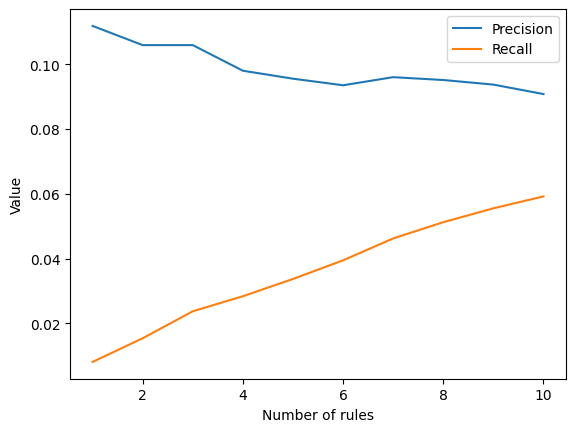

In [314]:
print(average_precision)
print(average_recall)

plt.plot(range(1,11), average_precision, label='Precision')
plt.plot(range(1,11), average_recall, label='Recall')
plt.xlabel('Number of rules')
plt.ylabel('Value')
plt.legend()
plt.show()

{6: [0.0, 0.0, 0.3333333333333333, 0.25, 0.2, 0.16666666666666666, 0.14285714285714285, 0.125, 0.1111111111111111, 0.1], 58: [0.0, 0.5, 0.3333333333333333, 0.25, 0.2, 0.16666666666666666, 0.14285714285714285, 0.125, 0.1111111111111111, 0.1111111111111111], 222: [1.0, 1.0, 0.6666666666666666, 0.5, 0.5, 0.4, 0.3333333333333333, 0.42857142857142855, 0.375, 0.3333333333333333], 455: [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], 554: [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.14285714285714285, 0.125, 0.1111111111111111, 0.1]}
{6: [0.0, 0.0, 0.01694915254237288, 0.01694915254237288, 0.01694915254237288, 0.01694915254237288, 0.01694915254237288, 0.01694915254237288, 0.01694915254237288, 0.01694915254237288], 58: [0.0, 0.047619047619047616, 0.047619047619047616, 0.047619047619047616, 0.047619047619047616, 0.047619047619047616, 0.047619047619047616, 0.047619047619047616, 0.047619047619047616, 0.047619047619047616], 222: [0.023255813953488372, 0.046511627906976744, 0.046511627906976744, 0.046511627

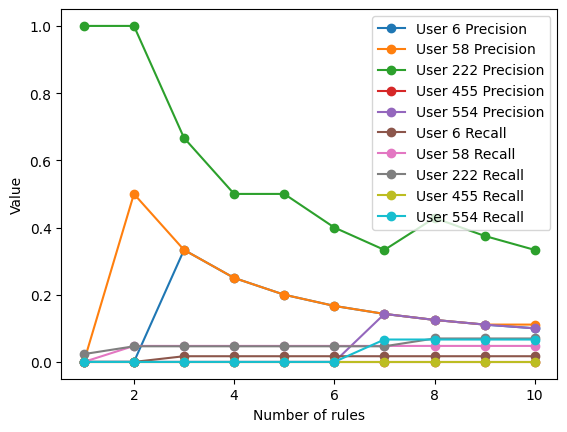

In [316]:
print(user_precision_dict)
print(user_recall_dict)

for user in user_ids:
    plt.plot(range(1, 11), user_precision_dict[user], marker='o', label=f'User {user} Precision')
for user in user_ids:
    plt.plot(range(1, 11), user_recall_dict[user], marker='o', label=f'User {user} Recall')
plt.xlabel('Number of rules')
plt.ylabel('Value')
plt.legend()
plt.show()
